<h1><center>Customer Churn Modeling </center></h1>

***

# TABLE OF CONTENTS


+ Introduction
+ Objective
+ Problem Statement
+ Approach
+ EDA, Model & Results
+ Conclusion
+ References

<hr>

### Introduction

A market has two key Parties
+ Buyer
+ Seller

Often the sellers have a profit motive and buyers an aim to maximize utility.

+ In midst of this cycle  many of the buyers change their habbits, switch to different products, due to pricing change, income or other factors. Thus for a business owner (seller) it is cruical to know whether a customer wil stay loyal in terms of buying or not. This is other terms is known as **customer churn**. Wherein a customer stops purchasing from the the particular company / organization. 



<hr>

### Objectives

Predict the customers who are going to churn soon with resonable accuracy. 
- Utlimately helping in making business decisions



<hr>

### Problem Definition

Financial institutions have clients those who close accounts or switch to different institutions.
This impacts the revenue model of the institution.
Thus from a business point of view, it is cruical to predict whether a customer will churn or not. 

In this context a customer having closed all their active accounts with the bank is said to have churned.

**" NOTE : "** Churn can mean something else as well basedd on the scenario. Eg: customer not trasacting for more than a year can be treated as churned. 

#### PROBLEM : Predict customers who are going to churn soon

<hr>

### Approach
This is an extension to the Problem Defnintion. You have to mention the process/appraoch that you have followed in order to reach out the above problem defintion.

<hr>

In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [411]:
# Reading the dataset
df = pd.read_csv("D:\Machine_Learning\customer_churn\churn.csv")
df.head(15) 

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [412]:
df.shape

(10000, 13)

Ten Thousand rows and 14 columns

In [413]:
df_numeric = df._get_numeric_data()
df_numeric.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [414]:
df.describe(include = ['O']) # Describes categorical columns

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


### EDA

In [415]:
# unique customers 
df.CustomerId.nunique()

10000

In [416]:
df["Exited"].value_counts()
# Proportion of churned and not churned is high, which might affect the training model as data is imbalanced. 

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot:ylabel='CreditScore'>

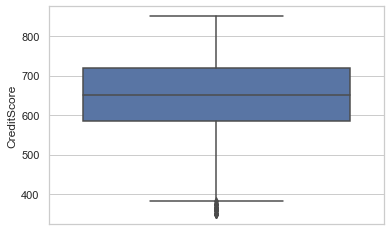

In [417]:
sns.boxplot(y=df['CreditScore'])

In [418]:
df.groupby(['Geography']).agg({'RowNumber':'count', 'Exited':'mean'})

,RowNumber,Exited
Geography,,
France,5014,0.161548
Germany,2509,0.324432
Spain,2477,0.166734


In [419]:
# Frace has the most customers who have churned, but the average number of churned customer in Germany is higher.

<AxesSubplot:xlabel='Gender', ylabel='count'>

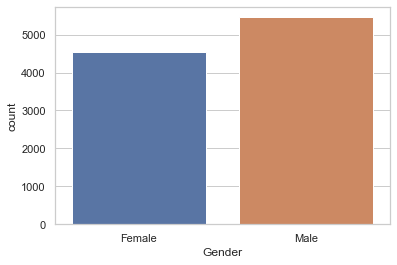

In [420]:
sns.countplot(x= 'Gender', data = df)

<AxesSubplot:ylabel='Age'>

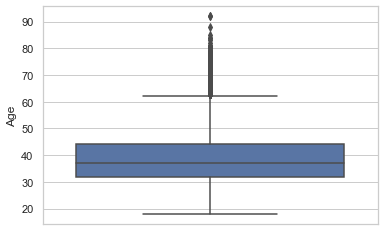

In [421]:
sns.boxplot(y=df['Age'])

<AxesSubplot:ylabel='Tenure'>

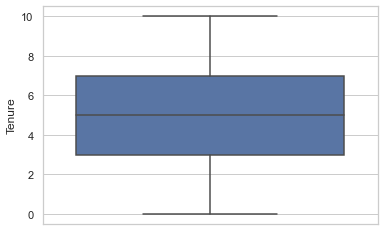

In [422]:
sns.boxplot(y=df['Tenure'])

<AxesSubplot:ylabel='Balance'>

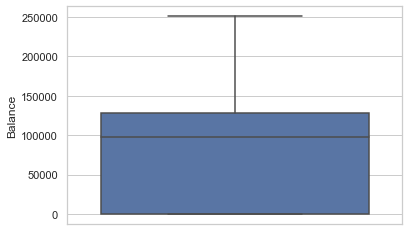

In [423]:
sns.boxplot(y=df['Balance'])

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

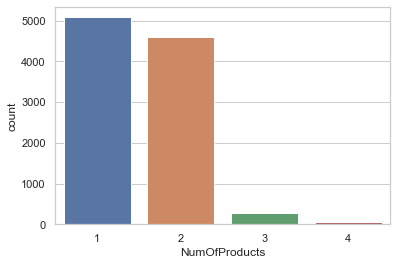

In [424]:
sns.countplot(x = 'NumOfProducts', data = df)

In [425]:
#Most of the customers have 1 or 2 products. 80/20 Rule.

In [426]:
df.groupby(['NumOfProducts']).agg({'RowNumber':'count', 'Exited':'mean'}) 

,RowNumber,Exited
NumOfProducts,,
1,5084,0.277144
2,4590,0.075817
3,266,0.827068
4,60,1.000000


In [427]:
# People who bought 4 products always churn, moreover ones who have 3 products exit 83% of the time

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

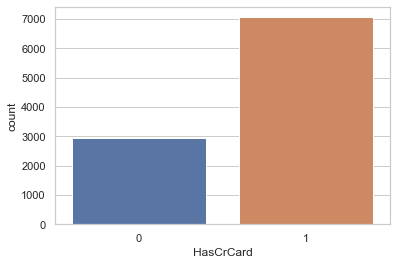

In [428]:
sns.countplot(x = 'HasCrCard', data = df)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

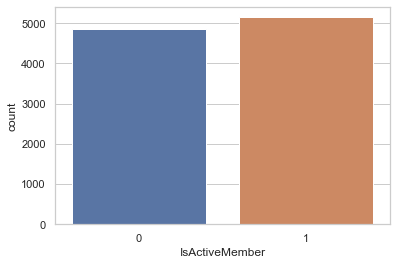

In [429]:
sns.countplot(x = 'IsActiveMember', data = df)

<AxesSubplot:ylabel='EstimatedSalary'>

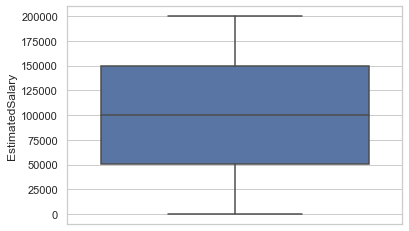

In [430]:
sns.boxplot(y=df['EstimatedSalary'])

In [431]:
# Dropping columns that are useful for modeling
df1 = df.drop(columns = ['RowNumber', 'CustomerId'])

In [432]:
df1_numeric = df1._get_numeric_data()

<AxesSubplot:>

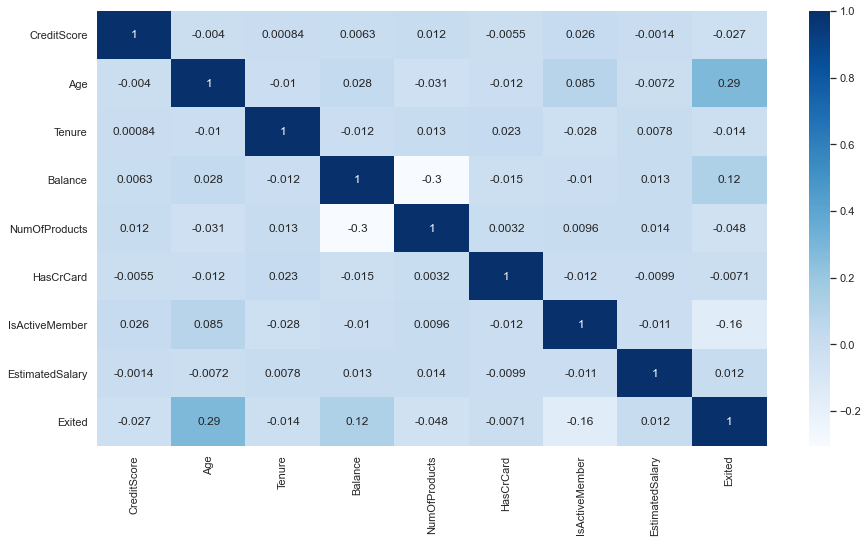

In [433]:
corr = df1_numeric.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, cmap = 'Blues', annot = True)

### Label Enconding for categorical Data

In [434]:
# Separating out different columns into various categories as defined above
target_var = ['Exited']

# numerical columns
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# categorical columns
cat_feats = [ 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [435]:
# Tenure, NumOfProducts has order value.
# HasCrCard, IsActiveNumber, Gender is binary categorical

In [436]:
# label encoding With  the sklearn method
le = LabelEncoder()

# Label encoding of categorical variable
df1['Gender'] = le.fit_transform(df1['Gender'])
df1['Geography'] = le.fit_transform(df1['Geography'])


In [437]:
df1['bal_per_product'] = df1.Balance/(df1.NumOfProducts)
df1['bal_by_est_salary'] = df1.Balance/(df1.EstimatedSalary)
df1['tenure_age_ratio'] = df1.Tenure/(df1.Age)
new_cols = ['bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio']
# Ensuring that the new column doesn't have any missing values
df1[new_cols].isnull().sum()

bal_per_product      0
bal_by_est_salary    0
tenure_age_ratio     0
dtype: int64

In [438]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,bal_per_product,bal_by_est_salary,tenure_age_ratio
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.000000,0.047619
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,83807.860000,0.744677,0.024390
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,53220.266667,1.401375,0.190476
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.000000,0.025641
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,125510.820000,1.587055,0.046512


In [439]:
df2 = df1[new_cols]
df2['Age'] = df1['Age']
df2['Exited'] = df1['Exited']
df2.head()

,bal_per_product,bal_by_est_salary,tenure_age_ratio,Age,Exited
0,0.000000,0.000000,0.047619,42,1
1,83807.860000,0.744677,0.024390,41,0
2,53220.266667,1.401375,0.190476,42,1
3,0.000000,0.000000,0.025641,39,0
4,125510.820000,1.587055,0.046512,43,0


<AxesSubplot:>

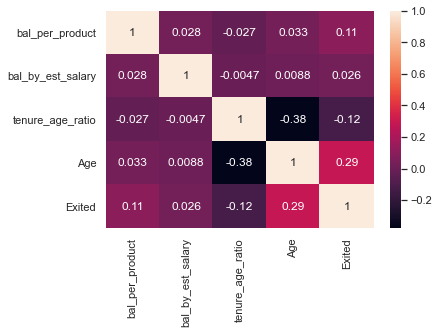

In [440]:
sns.heatmap(df2.corr(), annot=True)

### Split dataset into train and test

In [441]:
X = df1.drop(['Exited'], axis = 1) # axis for column
y = df['Exited']

In [442]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

## ALGORITHM / MODEL

### DECISION TREE

In [485]:
dec_tree = DecisionTreeClassifier(criterion='gini',max_depth =5, random_state = 42)
dec_tree.fit(X_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(X_test,y_test))

Decision Tree Classification Score:  0.857


In [489]:
dec_tree.tree_.max_depth

5

### Hyperparameter = max depth and criterion  to measure impurity (gini, entropy) 

In [483]:
for i in range(1,25):
    dec_tree = DecisionTreeClassifier(criterion='gini',max_depth =i ,random_state = 42)
    dec_tree.fit(X_train,y_train)
    print("Tree score with depth",i,"=",dec_tree.score(X_test,y_test) )

Tree score with depth 1 = 0.8035
Tree score with depth 2 = 0.844
Tree score with depth 3 = 0.8485
Tree score with depth 4 = 0.8545
Tree score with depth 5 = 0.857
Tree score with depth 6 = 0.8525
Tree score with depth 7 = 0.8505
Tree score with depth 8 = 0.851
Tree score with depth 9 = 0.8485
Tree score with depth 10 = 0.8455
Tree score with depth 11 = 0.833
Tree score with depth 12 = 0.828
Tree score with depth 13 = 0.8215
Tree score with depth 14 = 0.8085
Tree score with depth 15 = 0.7995
Tree score with depth 16 = 0.7995
Tree score with depth 17 = 0.7915
Tree score with depth 18 = 0.797
Tree score with depth 19 = 0.792
Tree score with depth 20 = 0.791
Tree score with depth 21 = 0.789
Tree score with depth 22 = 0.788
Tree score with depth 23 = 0.79
Tree score with depth 24 = 0.7905


In [446]:
#tree.export_graphviz(dec_tree,out_file="tree.dot",class_names=["Did not churn", "churned"], filled = True)

<AxesSubplot:>

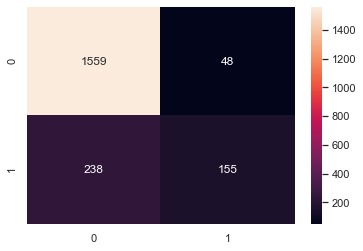

In [486]:
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt=".0f")


In [487]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.39      0.52       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [488]:
# Accuracy is 86%

### LOGISTIC REGRESSION

In [450]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [451]:
lr = LogisticRegression(random_state = 42)
lr.fit(X1_train, y1_train)


LogisticRegression(random_state=42)

<AxesSubplot:>

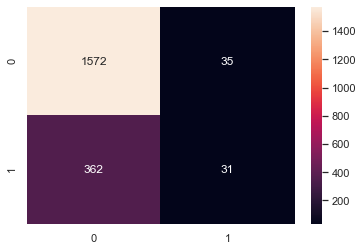

In [452]:
y1_pred = lr.predict(X1_test)
conf_mat = confusion_matrix(y1_test,y1_pred)
sns.heatmap(conf_mat,annot=True,fmt=".0f")


In [453]:
print(classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.47      0.08      0.14       393

    accuracy                           0.80      2000
   macro avg       0.64      0.53      0.51      2000
weighted avg       0.75      0.80      0.74      2000



In [454]:
# Accuracy is 80%

### Hyperparameter = penalty for wrong predictions

In [455]:
# only these two are used as lbfgs solver supports only 'l2' or 'none' penalties
penalty = ['l2','none']
for i in penalty:
    lr = LogisticRegression(random_state = 42, penalty = i)
    lr.fit(X1_train, y1_train)
    print(i,"penalty has a mean accuracy of ", lr.score(X, y))


l2 penalty has a mean accuracy of  0.7912
none penalty has a mean accuracy of  0.7912


In [456]:
# Seems to have no difference.

## Better amongst Decision tree and Logistic Regression to predict churn is DECISION TREE 

In [457]:
# take user input 

In [458]:
df1.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'bal_per_product', 'bal_by_est_salary', 'tenure_age_ratio'],
      dtype='object')

In [461]:
l = []
l.append(input("Enter your Credit Score:"))
l.append(input("Enter your Country ():"))
l.append(input("Gender:"))
age = input("Enter your Age:")
l.append(age)
t = input("Enter Tenure:")
l.append(t)
b = input("Enter your Balance:")
l.append(b)
n = input("Enter your Num Of Products:")
l.append(n)
l.append(input("Enter your HasCrCard:"))
l.append(input("Enter your IsActiveMember:"))
es = input("Enter your EstimatedSalary:")
l.append(int(es))
l.append(int(b)/int(n))
l.append(int(b)/int(es))
l.append(int(t)/int(age))

Enter your Credit Score:650
Enter your Country ():1
Gender:0
Enter your Age:38
Enter Tenure:1
Enter your Balance:76500
Enter your Num Of Products:2
Enter your HasCrCard:0
Enter your IsActiveMember:1
Enter your EstimatedSalary:100000


In [462]:
output = dec_tree.predict([l])
if output ==0:
    print(" Customer will not churn with an accuracy of 86%")
else: 
    print("Customer will churn with an accuracy of 86%")

 Customer will not churn with an accuracy of 86%


<hr/>

### References

1. https://www.thepythoncode.com/article/customer-churn-detection-using-sklearn-in-python#intro
1. https://towardsdatascience.com/choosing-the-right-encoding-method-label-vs-onehot-encoder-a4434493149b
1.https://scikit-learn.org/

